<a href="https://colab.research.google.com/github/JovianaYoung/Joviana_Young_2209116912_Data-Mining_A22/blob/main/Checkpoint_(5)_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISIS PREDIKSI HARGA HANDPHONE**

#**Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import linecache
from sklearn import linear_model
%matplotlib inline

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari dataset ini adalah untuk memahami masalah bisnis agar dapat meningkatkan akurasi prediksi harga handphone, membantu dalam pengambilan keputusan bisnis, serta untuk memberikan informasi yang lebih akurat bagi pelanggan.

##**Assess Situation**

Situasi bisnis yang mendasari adalah ketidakakuratan pada estimasi harga handphone yang mengakibatkan harga yang ditawarkan tidak sesuai dengan semestinya.

##**Data Mining Goals**

Tujuan dari Data Mining pada dataset ini adalah untuk dapat memprediksi harga handphone dan dapat memberikan informasi kepada pelanggan mengenai harga handphone yang sesuai.

##**Project Plan**

Rencana proyek untuk menganalisis dataset dimulai dengan mengumpulkan data terlebih dahulu. Selanjutnya, data akan diidentifikasi sesuai dengan karakteristiknya. Setelah itu, dilakukan analisis data  untuk menemukan hubungan antar variabel. Selain itu, kualitas data juga akan dievaluasi, dan masalah data akan diatasi pada tahap selanjutnya. Tahap ini sangat penting untuk memastikan kesuksesan pada analisis data.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Sumber data berikut dari kaggle.
Berikut Linknya:
https://www.kaggle.com/datasets/rkiattisak/mobile-phone-price

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/JovianaYoung/Joviana_Young_2209116912_Data-Mining_A22/main/Mobile%20phone%20price.csv")
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


##**Describe Data**

####Informasi Dasar

In [ ]:
df.shape

(407, 8)

Dari describe data informasi dasar yang telah ditampilkan diatas dapat ditarik kesimpulan bahwa pada dataframe diatas memiliki 407 baris dan 8 kolom.

####Informasi Lanjutan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


Dari describe data informasi lanjutan yang telah ditampilkan diatas dapat ditarik kesimpulan bahwa terdapat 8 kolom dengan penjelasan detail berikut ini:
1. Nama kolom : Brand
jumlah data : 407
Tipe data : object
2. Nama kolom : Model
jumlah data : 407
Tipe data : object
3. Nama kolom : Storage
jumlah data : 407
Tipe data : object
4. Nama kolom : RAM
jumlah data : 407
Tipe data : object
5. Nama kolom : Screen Size
jumlah data : 407
Tipe data : object
6. Nama kolom : Camera
jumlah data : 407
Tipe data : object
7. Nama kolom : Baterai Capacity
jumlah data : 407
Tipe data : int
8. Nama kolom : Price
jumlah data : 407
Tipe data : object

Dapat dilihat dari penjelasan diatas bahwa hanya kolom Baterai Capacity yang memiliki tipe data integer, dikarenakan data belum dilakukan proses data cleaning pada dataset tersebut.

####Informasi Statistik Deskriptif

In [ ]:
df.describe()

,Battery Capacity (mAh)
count,407.000000
mean,4676.476658
std,797.193713
min,1821.000000
25%,4300.000000
50%,5000.000000
75%,5000.000000
max,7000.000000


Dari describe data informasi statistik deskriptif menghasilkan output yang memberikan wawasan tentang distribusi Kapasitas Baterai pada data smartphone yang ada. Pada output diatas hanya menampilkan kolom battery capacity dikarenakan tipe datanya integer, sedangkan kolom yang lain masih bertipe data object. untuk penjelasan tiap kolom diatas dapat dilihat dibawah ini:
1. count: 407.000000 - Menunjukkan bahwa terdapat 407 nilai yang tidak kosong (non-null) pada kolom tersebut.
2. mean: 4676.476658 - Merupakan rata-rata Kapasitas Baterai, yaitu sekitar 4676 mAh.
3. std: 797.193713 - Merupakan standar deviasi, yang mengukur seberapa jauh Kapasitas Baterai tersebar dari rata-rata. Semakin tinggi standar deviasi, semakin besar variasi Kapasitas Baterai.
4. Min: 1821.000000 - Merupakan Kapasitas Baterai minimum, yaitu 1821 mAh.
5. 25%: 4300.000000 - Merupakan kuartil pertama, juga dikenal sebagai nilai Q1. Ini mewakili nilai di bawah 25% Kapasitas Baterai.
6. 50%: 5000.000000 - Merupakan median atau kuartil kedua (Q2). Ini mewakili nilai tengah ketika Kapasitas Baterai diurutkan dari terendah ke tertinggi.
7. 75%: 5000.000000 - Merupakan kuartil ketiga (Q3). Ini mewakili nilai di bawah 75% Kapasitas Baterai.
8. Max: 7000.000000 - Merupakan Kapasitas Baterai maksimum, yaitu 7000 mAh.

##**Exploratory Data Analysis**

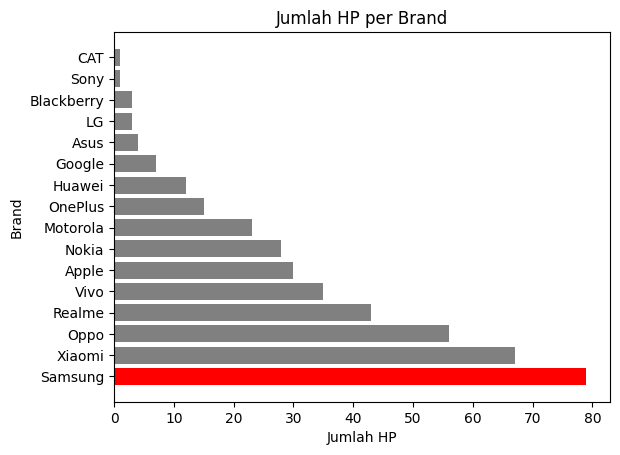

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah HP untuk setiap brand
brand_counts = df['Brand'].value_counts()

# Temukan jumlah HP paling tinggi
max_count = brand_counts.max()

# Buat bar chart vertikal
plt.barh(brand_counts.index, brand_counts, color="gray")

# Set warna untuk bar dengan jumlah HP paling tinggi
for i, count in enumerate(brand_counts):
    if count == max_count:
        plt.barh(i, count, color='red')
plt.xlabel('Jumlah HP')
plt.ylabel('Brand')
plt.title('Jumlah HP per Brand')
plt.show()

Dari hasil visualisasi diatas dapat disimpulkan bahwa brand HP Samsung memiliki jumlah unit yang paling banyak dari brand lainnya.



##**Verify Data Quality**

####Missing Values

In [ ]:
df.isna().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

Dari hasil codingan diatas dapat dilihat bahwa tidak terdapat nilai yang kosong dari masing-masing kolom pada data tersebut.


####Outliers Values

In [ ]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Mengecek outliers untuk setiap kolom numerik
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    outliers = detect_outliers(df[column])
    if not outliers.empty:
        print(f"Outliers dalam kolom '{column}':")
        print(outliers)
    else:
        print(f"Tidak ada outliers dalam kolom '{column}'")

Outliers dalam kolom 'Battery Capacity (mAh)':
0      3095
5      2815
13     2227
25     3110
32     1821
39     2942
45     2227
62     1821
68     2942
74     3110
77     2815
90     3000
208    7000
289    1821
305    2815
308    2942
315    2800
318    2815
326    3110
333    1821
334    7000
338    3174
347    2691
355    2942
369    2227
379    1821
384    2815
388    3110
396    2942
Name: Battery Capacity (mAh), dtype: int64


Dari hasil output diatas dapat disimpulkan bahwa terdapat outlier pada kolom battery capacity. Output diatas baru bisa menampilkan 1 kolom saja yang memiliki outlier dikarenakan kolom-kolom lain masih bertipe data object jadi codingan tersebut belum bisa mendeteksi outlier pada kolom lain.

####Duplicated Values

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
402    False
403    False
404    False
405    False
406     True
Length: 407, dtype: bool

Dari hasil codingan diatas menunjukkan bahwa terdapat 406 baris dalam DataFrame yang bukan duplikat.
Tetapi terdapat 1 baris duplikat dalam DataFrame, yaitu pada baris terakhir.

####Inconsistent Values / Noise (Optional)

In [ ]:
for column in df.columns:
  print(f"Kolom '{column}':")

  unique_values_count = len(df[column].unique())

  print(f"Jumlah Nilai Unik: {unique_values_count}")
  print()


Kolom 'Brand':
Jumlah Nilai Unik: 16

Kolom 'Model':
Jumlah Nilai Unik: 239

Kolom 'Storage ':
Jumlah Nilai Unik: 13

Kolom 'RAM ':
Jumlah Nilai Unik: 20

Kolom 'Screen Size (inches)':
Jumlah Nilai Unik: 41

Kolom 'Camera (MP)':
Jumlah Nilai Unik: 143

Kolom 'Battery Capacity (mAh)':
Jumlah Nilai Unik: 48

Kolom 'Price ($)':
Jumlah Nilai Unik: 89



Pada informasi diatas, dijelaskan tentang jumlah unit dalam setiap kolom dari dataset.


*   Kolom Brand: Terdapat nilai 16 unik dalam kolom ini, yang berarti terdapat variasi merk-merk HP dari masing-masing Brand.
*   Kolom Model: Terdapat nilai 239 unik dalam kolom ini, yang berarti terdapat variasi model-model HP.
*  Kolom Storage: Terdapat nilai 13 unik dalam kolom ini, yang berarti terdapat variasi penyimpanan-penyimpanan pada HP.
*   Kolom RAM: Terdapat nilai 20 unik dalam kolom ini, yang berarti terdapat variasi internal RAM HP.    
*   Kolom Screen Size: Terdapat nilai 41 unik dalam kolom ini, yang berarti terdapat variasi Layar inch HP.
*   Kolom Camera: terdapat nilai 143 unik  dalam kolom ini, yang berarti terdapat variasi kamera HP berdasarkan Megapixelnya.
*   Kolom Battery Capacity: Terdapat nilai 48 unik dalam kolom ini, yang berarti terdapat variasi kapasitas baterai HP.
*   Kolom Price: Terdapat nilai 89 unik dalam kolom ini, yang berarti terdapat variasi Harga HP.









#**DATA PREPARATION**

##**Data Cleaning**

###**Penanganan Missing Values**

###**Pengecekkan Missing Values**

In [ ]:
print((df.isna().sum() / len(df)) * 100)

Brand                     0.0
Model                     0.0
Storage                   0.0
RAM                       0.0
Screen Size (inches)      0.0
Camera (MP)               0.0
Battery Capacity (mAh)    0.0
Price ($)                 0.0
dtype: float64


Dapat dilihat dari codingan diatas bahwa tidak terdapat missing values dalam dataset tersebut

###**Penanganan Duplicated Values**

In [ ]:
df[df.duplicated()]

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
45,Apple,iPhone 12 Mini,64 GB,4 GB,5.4,12 + 12,2227,699
61,Xiaomi,Poco M3 Pro 5G,64 GB,4 GB,6.5,48 + 2 + 2,5000,199
132,Nokia,XR20,128GB,6GB,6.67,48MP + 13MP,4630,$549
170,Motorola,Moto G Stylus 5G,128GB,5GB,6.8,48MP + 8MP + 5MP,5000,$399
195,Oppo,A74 5G,128GB,6GB,6.5,48MP + 2MP + 2MP,5000,$299
221,Vivo,Y12s,32GB,3GB,6.51,13MP + 2MP,5000,$149
229,Xiaomi,Redmi Note 10 Pro Max,128GB,8GB,6.67,108MP + 8MP + 5MP + 2MP,5020,$329
240,Nokia,C20 Plus,32GB,3GB,6.5,8MP + 2MP,4950,$99
246,Xiaomi,Poco X3 Pro,128GB,6GB,6.67,48MP + 8MP + 2MP + 2MP,5160,$249
248,Oppo,A16,32GB,3GB,6.52,13MP + 2MP + 2MP,5000,$149


Dapat dilihat dari dataset tersebut bahwa terdapat data yang duplikat sehingga harus dihapus

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
401    False
402    False
403    False
404    False
405    False
Length: 381, dtype: bool

Dari hasil codingan diatas dilakukan penghapusan data yang duplikat dengan menggunakan fungsi df.drop_duplicates.

###**Penanganan Outliers**

###**Pengecekkan Outliers**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Battery Capacity (mAh),7.086614


Bisa dilihat dari hasil codingan berikut bahwa terdapat nilai outlier pada kolom battery capacity.

<Axes: >

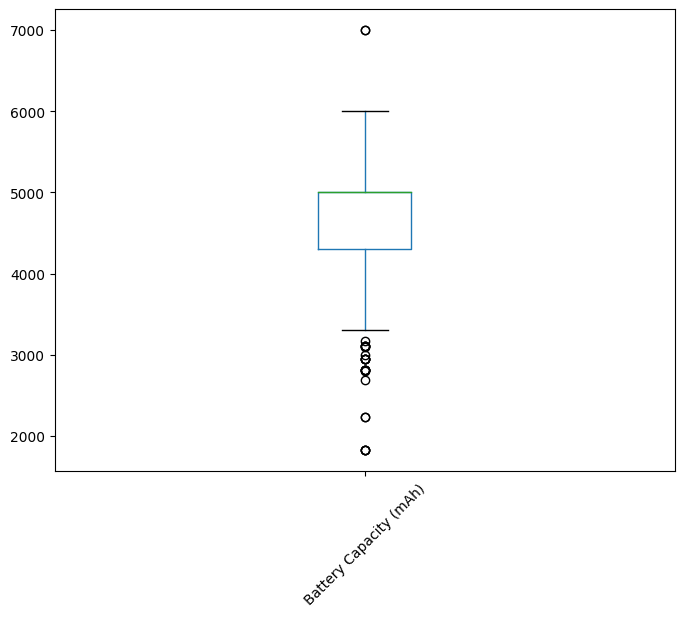

In [ ]:
df.boxplot(grid=False, rot=45, figsize=(8,6))

###**Hapus Outliers**

Melakukan penghapusan baris pada kolom "Battery Capacity (mAh)" untuk menanganani outliers

In [ ]:
Q1 = df['Battery Capacity (mAh)'].quantile(0.25)
Q3 = df['Battery Capacity (mAh)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Battery Capacity (mAh)'] >= lower_bound) & (df['Battery Capacity (mAh)'] <= upper_bound)]

In [ ]:
Q1 = df['Battery Capacity (mAh)'].quantile(0.25)
Q3 = df['Battery Capacity (mAh)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Battery Capacity (mAh)']=np.where(df['Battery Capacity (mAh)']>upper_whisker,upper_whisker,np.where(df['Battery Capacity (mAh)']<lower_whisker,lower_whisker,df['Battery Capacity (mAh)']))

<ipython-input-948-e97e50f308dc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Battery Capacity (mAh)']=np.where(df['Battery Capacity (mAh)']>upper_whisker,upper_whisker,np.where(df['Battery Capacity (mAh)']<lower_whisker,lower_whisker,df['Battery Capacity (mAh)']))


In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Battery Capacity (mAh),0.0


Dari hasil codingan diatas dapat disimpulkan bahwa outlier pada kolom battery capacity telah dihapus.

<Axes: >

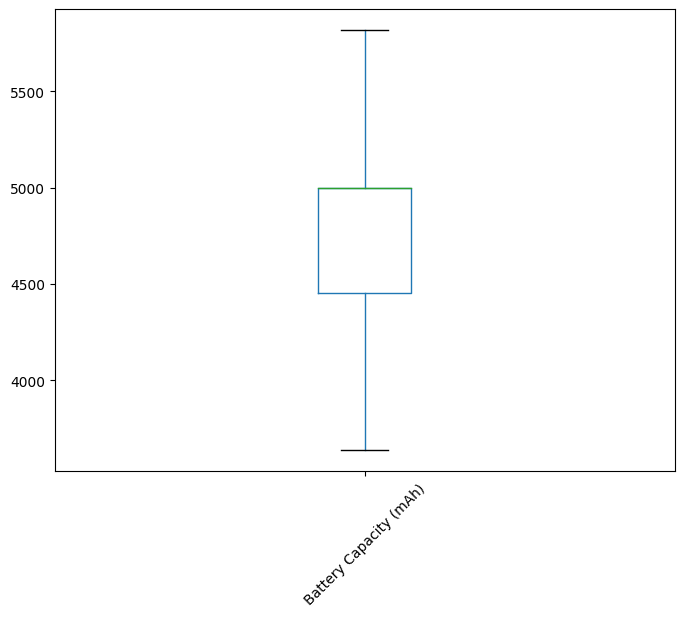

In [ ]:
df.boxplot(grid=False, rot=45, figsize=(8,6))

Dapat dilihat dari visualisasi tersebut bahwa nilai outlier telah dihapus.

###**Penanganan Inconsistent Values**

In [ ]:
y = [x for x in df['Price ($)'] if x.isnumeric() == False]
print(y)

['$799 ', '$399 ', '$699 ', '$329 ', '$399 ', '$999 ', '$699 ', '$699 ', '$549 ', '$1,299 ', '$999 ', '$899 ', '$449 ', '$319 ', '$269 ', '$349 ', '$269 ', '$279 ', '$249 ', '$349 ', '$699 ', '$699 ', '$299 ', '$999 ', '$969 ', '$1,199 ', '$149 ', '$139 ', '$99 ', '$699 ', '$99 ', '$199 ', '$169 ', '$999 ', '$499 ', '$399 ', '$799 ', '$179 ', '$219 ', '$249 ', '$149 ', '$199 ', '$279 ', '$179 ', '$899 ', '$269 ', '$229 ', '$399 ', '$239 ', '$149 ', '$279 ', '$329 ', '$149 ', '$449 ', '$279 ', '$199 ', '$399 ', '$179 ', '$399 ', '$109 ', '$219 ', '$149 ', '$299 ', '$279 ', '$149 ', '$189 ', '$169 ', '$389 ', '$1,199 ', '$299 ', '$219 ', '$299 ', '$149 ', '$249 ', '$219 ', '$249 ', '$179 ', '$299 ', '$309 ', '$179 ', '$369 ', '$349 ', '$499 ', '$199 ', '$229 ', '$299 ', '$129 ', '$449 ', '$499 ', '$279 ', '$849 ', '$279 ', '$299 ', '$249 ', '$149 ', '$199 ', '$469 ', '$329 ', '$279 ', '$369 ', '$269 ', '$329 ', '$299 ', '$299 ', '$239 ', '$329 ', '$149 ', '$189 ', '$449 ', '$399 ', '$249

Dapat dilihat dari data tersebut terdapat data yang memiliki tanda dolar dan kesamaan di dalamnya. Salah satu cara untuk memperbaikinya adalah menghapus semua tanda baca.

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def removing_punctuation_df(df, column_name):

    removed_df = []
    for a in df[column_name]:
        message = str(a)
        punct_removed = [char for char in message if char not in string.punctuation]
        punct_removed = ''.join(punct_removed)
        punct_removed = int(punct_removed)
        removed_df.append(punct_removed)
    return removed_df

In [ ]:
Price = removing_punctuation_df(df, 'Price ($)')
df['Price'] = Price
df = df.drop(['Price ($)'], axis=1)

Codingan ini bertujuan untuk menghapus tanda baca, dolar dari kolom 'Price' tersebut.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 1 to 405
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   354 non-null    object 
 1   Model                   354 non-null    object 
 2   Storage                 354 non-null    object 
 3   RAM                     354 non-null    object 
 4   Screen Size (inches)    354 non-null    object 
 5   Camera (MP)             354 non-null    object 
 6   Battery Capacity (mAh)  354 non-null    float64
 7   Price                   354 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 24.9+ KB


Dapat dilihat bahwa hasil dari codingan diatas adalah untuk merubah tipe data Price yang sebelumnya object menjadi int.

In [ ]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

Codingan tersebut bertujuan untuk memeriksa apakah suatu nilai (variabel num) dapat diubah menjadi tipe data float atau tidak.

In [ ]:
y = [x for x in df['Screen Size (inches)'] if isfloat(x) == False]
print(y)

['6.8 + 3.9', '7.6 (unfolded)']



Codingan tersebut bertujuan untuk membuat list y yang berisi nilai-nilai dari kolom 'Screen Size (inches)' yang tidak dapat diubah menjadi tipe data float. Fungsi isfloat digunakan untuk memeriksa apakah suatu nilai dapat diubah menjadi tipe data float atau tidak.

In [ ]:
y = [x for x in df['Storage '] if x.isnumeric() == False]
print(y)

['256 GB', '128 GB', '128 GB', '128 GB', '256 GB', '128 GB', '128 GB', '256 GB', '128 GB', '128 GB', '128 GB', '256 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '32 GB', '128 GB', '32 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '64 GB', '64 GB', '64 GB', '64 GB', '128 GB', '128 GB', '128 GB', '128 GB', '64 GB', '64 GB', '128 GB', '256 GB', '64 GB', '32 GB', '128 GB', '128 GB', '128 GB', '256 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '256 GB', '64 GB', '128GB', '128GB', '128GB', '128GB', '128GB', '256GB', '256GB', '256GB', '128GB', '128GB', '256GB', '256GB', '128GB', '128GB', '128GB', '128GB', '128GB', '128GB', '64GB', '128GB', '128GB', '64GB', '32GB', '128GB', '256GB', '256GB', '32GB', '32GB', '32GB', '128GB', '32GB', '128GB', '64GB', '128GB', '128GB', '64GB', '256GB', '64GB', '128GB', '64GB', '

Codingan tersebut bertujuan untuk membuat list y yang berisi nilai-nilai dari kolom 'Storage' yang tidak dapat diubah menjadi tipe data numeric.

In [ ]:
y = [x for x in df['RAM '] if x.isnumeric() == False]
print(y)

['12 GB', '8 GB', '6 GB', '8 GB', '8 GB', '6 GB', '8 GB', '12 GB', '6 GB', '6 GB', '8 GB', '12 GB', '6 GB', '8 GB', '6 GB', '6 GB', '8 GB', '6 GB', '4 GB', '6 GB', '8 GB', '6 GB', '3 GB', '6 GB', '3 GB', '4 GB', '6 GB', '4 GB', '6 GB', '8 GB', '4 GB', '6 GB', '8 GB', '4 GB', '3 GB', '4 GB', '4 GB', '8 GB', '8 GB', '8 GB', '4 GB', '4 GB', '4 GB', '4 GB', '4 GB', '4 GB', '2 GB', '6 GB', '4 GB', '4 GB', '6 GB', '8 GB', '8 GB', '12 GB', '8 GB', '8 GB', '6 GB', '8 GB', '6 GB', '4 GB', '4 GB', '4 GB', '8 GB', '6 GB', '12 GB', '4 GB', '8GB', '8GB', '8GB', '6GB', '8GB', '12GB', '12GB', '12GB', '6GB', '8GB', '8GB', '8GB', '6GB', '6GB', '8GB', '8GB', '8GB', '6GB', '4GB', '6GB', '6GB', '6GB', '3GB', '8GB', '12GB', '12GB', '3GB', '3GB', '3GB', '6GB', '2GB', '6GB', '4GB', '8GB', '6GB', '6GB', '12GB', '4GB', '6GB', '4GB', '4GB', '4GB', '6GB', '4GB', '8GB', '6GB', '6GB', '6GB', '4GB', '3GB', '6GB', '8GB', '4GB', '6GB', '8GB', '4GB', '5GB', '4GB', '8GB', '3GB', '4GB', '3GB', '6GB', '8GB', '3GB', '4GB'

Codingan tersebut bertujuan untuk membuat list y yang berisi nilai-nilai dari kolom 'RAM' yang tidak dapat diubah menjadi tipe data numeric.

In [ ]:
df.iloc[88,4] = 6.8
df.iloc[320,4] = 7.8

In [ ]:
df["Screen Size (inches)"] = df["Screen Size (inches)"].str.replace("7.6 (unfolded)","7.6", regex=False)
df["Screen Size (inches)"] = df["Screen Size (inches)"].str.replace("6.8 + 3.9", "6.8", regex=False)
df["Screen Size (inches)"] = df["Screen Size (inches)"].str.replace(" + ","+", regex=False)
df["Screen Size (inches)"] = pd.to_numeric(df["Screen Size (inches)"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 1 to 405
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   354 non-null    object 
 1   Model                   354 non-null    object 
 2   Storage                 354 non-null    object 
 3   RAM                     354 non-null    object 
 4   Screen Size (inches)    352 non-null    float64
 5   Camera (MP)             354 non-null    object 
 6   Battery Capacity (mAh)  354 non-null    float64
 7   Price                   354 non-null    int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 24.9+ KB


Codingan diatas bertujuan untuk merubah tipe data pada kolom Screen Size dari object menjadi tipe data float.

In [ ]:
def no_GBs(df, column):
    y = []
    for x in df[column]:
        string = x.replace("GB", "")
        string = int(string)
        y.append(string)
    return y

In [ ]:
RAM = no_GBs(df, "RAM ")
df['RAM'] = RAM
df = df.drop('RAM ', axis=1)

Codingan diatas bertujuan untuk merubah tipe data pada kolom RAM dari object menjadi tipe data int.

In [ ]:
Storage = no_GBs(df, 'Storage ')
df['Storage'] = Storage
df = df.drop('Storage ', axis=1)

Codingan diatas bertujuan untuk merubah tipe data pada kolom Storage dari object menjadi tipe data int.

In [ ]:
df['Brand'] = df['Brand'].str.lower()
df['Model'] = df['Model'].str.lower()

Codingan di atas berfungsi untuk mengubah teks pada kolom 'Brand' dan 'Model' dalam DataFrame (df) menjadi huruf kecil (lowercase). Dengan tujuan untuk konsistensi dan mempermudah pemrosesan data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 1 to 405
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   354 non-null    object 
 1   Model                   354 non-null    object 
 2   Screen Size (inches)    352 non-null    float64
 3   Camera (MP)             354 non-null    object 
 4   Battery Capacity (mAh)  354 non-null    float64
 5   Price                   354 non-null    int64  
 6   RAM                     354 non-null    int64  
 7   Storage                 354 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 24.9+ KB


##**Construct Data**

In [ ]:
df.rename(columns = {"jumlah kamera": "JumlahKamera","Battery Capacity (mAh)": "BatteryCapacity","Screen Size (in)": "ScreenSize"},inplace=True)

In [ ]:
df.head()

,Brand,Model,Screen Size (inches),Camera (MP),BatteryCapacity,Price,RAM,Storage
1,samsung,galaxy s21 ultra,6.80,108 + 10 + 10 + 12,5000.0,1199,12,256
2,oneplus,9 pro,6.70,48 + 50 + 8 + 2,4500.0,899,8,128
3,xiaomi,redmi note 10 pro,6.67,64 + 8 + 5 + 2,5020.0,279,6,128
4,google,pixel 6,6.40,50 + 12.2,4614.0,799,8,128
6,samsung,galaxy z flip3,6.70,12 + 12,3637.5,999,8,256


Codingan diatas bertujuan untuk mengubah nama kolom menjadi lebih mudah dibaca dan dipahami.

In [ ]:
df['JumlahKamera'] = df['Camera (MP)'].str.count('\\+') + 1

In [ ]:
df['JumlahKamera'].unique()

array([4, 2, 3, 1])

Codingan tersebut bertujuan untuk Memisahkan nilai kamera dan membuat kolom jumlah kamera.

In [ ]:
df.head()

,Brand,Model,Screen Size (inches),Camera (MP),BatteryCapacity,Price,RAM,Storage,JumlahKamera
1,samsung,galaxy s21 ultra,6.80,108 + 10 + 10 + 12,5000.0,1199,12,256,4
2,oneplus,9 pro,6.70,48 + 50 + 8 + 2,4500.0,899,8,128,4
3,xiaomi,redmi note 10 pro,6.67,64 + 8 + 5 + 2,5020.0,279,6,128,4
4,google,pixel 6,6.40,50 + 12.2,4614.0,799,8,128,2
6,samsung,galaxy z flip3,6.70,12 + 12,3637.5,999,8,256,2


In [ ]:
res1 = []
res2 = []
res3 = []
res4 = []
for x in df['Camera (MP)']:
    resolutions = x.split('+')
    tam = len(resolutions)

    if tam == 1:
        res1.append(resolutions[0])
        res2.append('0')
        res3.append('0')
        res4.append('0')

    if tam == 2:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append('0')
        res4.append('0')

    if tam == 3:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append('0')

    if tam == 4:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append(resolutions[3])

df['res1'] = res1
df['res2'] = res2
df['res3'] = res3
df['res4'] = res4

df = df.drop(columns='Camera (MP)')

Codingan ini bertujuan untuk mengubah format informasi resolusi kamera yang sebelumnya digabung dalam 1 kolom menjadi kolom terpisah untuk setiap resolusi yang ditemukan.

In [ ]:
df.rename(columns = {"res1":"cam1","res2":"cam2","res3":"cam3","res4":"cam4"},inplace=True)

Codingan berikut bertujuan untuk mengubah nama kolom menjadi lebih mudah dibaca dan dipahami.

In [ ]:
df['cam1'] = df['cam1'].str.replace('MP','')
df['cam2'] = df['cam2'].str.replace('MP','')
df['cam3'] = df['cam3'].str.replace('MP','')
df['cam4'] = df['cam4'].str.replace('MP','')

Codingan berikut menggunakan fungsi str.replace('MP', ''), kode ini menghapus substring "MP" dari setiap nilai di kolom-kolom kamera ('cam1', 'cam2', 'cam3', 'cam4'). Tujuan dari pembersihan ini mungkin untuk mempersiapkan data kamera dalam format yang lebih bersih.

In [ ]:
df['cam4'] = df['cam4'].str.replace('3D','0')
df['cam4'] = df['cam4'].str.replace('ToF','0')

 Codingan berikut bertujuan mengganti setiap kemunculan substring "3D" di dalam kolom 'cam4' dengan string "0" dan mengganti setiap kemunculan substring "ToF" di dalam kolom 'cam4' dengan string "0".

In [ ]:
df['cam1'] = pd.to_numeric(df['cam1'])

df['cam2'] = pd.to_numeric(df['cam2'])

df['cam3'] = pd.to_numeric(df['cam3'])

df['cam4'] = pd.to_numeric(df['cam4'])

Codingan berikut berfungsi untuk mengonversi nilai-nilai di dalam kolom cam,cam2,cam3, dan cam4 menjadi tipe data numeric

In [ ]:
df.head()

,Brand,Model,Screen Size (inches),BatteryCapacity,Price,RAM,Storage,JumlahKamera,cam1,cam2,cam3,cam4
1,samsung,galaxy s21 ultra,6.80,5000.0,1199,12,256,4,108.0,10.0,10,12.0
2,oneplus,9 pro,6.70,4500.0,899,8,128,4,48.0,50.0,8,2.0
3,xiaomi,redmi note 10 pro,6.67,5020.0,279,6,128,4,64.0,8.0,5,2.0
4,google,pixel 6,6.40,4614.0,799,8,128,2,50.0,12.2,0,0.0
6,samsung,galaxy z flip3,6.70,3637.5,999,8,256,2,12.0,12.0,0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 1 to 405
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 354 non-null    object 
 1   Model                 354 non-null    object 
 2   Screen Size (inches)  352 non-null    float64
 3   BatteryCapacity       354 non-null    float64
 4   Price                 354 non-null    int64  
 5   RAM                   354 non-null    int64  
 6   Storage               354 non-null    int64  
 7   JumlahKamera          354 non-null    int64  
 8   cam1                  354 non-null    float64
 9   cam2                  354 non-null    float64
 10  cam3                  354 non-null    int64  
 11  cam4                  354 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 36.0+ KB


##**Data Reduction**

###**Mengurangi Fitur Yang Kurang Relevan**

In [ ]:
df = df.drop(['Model'], axis=1)

Dari codingan diatas dapat dilihat bahwa dilakukan penghapusan pada kolom model, karena fitur ini kurang relevan untuk dataset tersebut

###**Pengecekkan Hasil**

In [ ]:
df.head()

,Brand,Screen Size (inches),BatteryCapacity,Price,RAM,Storage,JumlahKamera,cam1,cam2,cam3,cam4
1,samsung,6.80,5000.0,1199,12,256,4,108.0,10.0,10,12.0
2,oneplus,6.70,4500.0,899,8,128,4,48.0,50.0,8,2.0
3,xiaomi,6.67,5020.0,279,6,128,4,64.0,8.0,5,2.0
4,google,6.40,4614.0,799,8,128,2,50.0,12.2,0,0.0
6,samsung,6.70,3637.5,999,8,256,2,12.0,12.0,0,0.0


##**Data Transformation**

###**Encoding**

In [ ]:
df['idBrand']=df.loc[:,'Brand']


Codingan di atas membuat kolom baru bernama 'idBrand' dalam DataFrame 'df' dan mengisinya dengan nilai-nilai dari kolom 'Brand'.

In [ ]:
df['idBrand']=df['idBrand'].replace(['cat','sony','blackberry','lg','asus','google','huawei','oneplus','motorola','nokia','apple','vivo','realme','oppo','xiaomi','samsung'],['001','002','003','004','005','006','007','008','009','010','011','012','013','014','015','016'])
df[['idBrand']]=df[['idBrand']].apply(pd.to_numeric)

dari codingan tersebut dapat dilihat bahwa menggunakan metode replace dan kemudian mengonversi seluruh kolom 'idBrand' ke tipe data numerik menggunakan pd.to_numeric. Dengan tujuan menggantikan nilai-nilai kategori dalam kolom 'idBrand' dengan kode numerik.

In [ ]:
df = df.drop(['Brand'], axis=1)

###**Pengecekkan Hasil**

In [ ]:
df.head()

,Screen Size (inches),BatteryCapacity,Price,RAM,Storage,JumlahKamera,cam1,cam2,cam3,cam4,idBrand
1,6.80,5000.0,1199,12,256,4,108.0,10.0,10,12.0,16
2,6.70,4500.0,899,8,128,4,48.0,50.0,8,2.0,8
3,6.67,5020.0,279,6,128,4,64.0,8.0,5,2.0,15
4,6.40,4614.0,799,8,128,2,50.0,12.2,0,0.0,6
6,6.70,3637.5,999,8,256,2,12.0,12.0,0,0.0,16


Codingan tersebut dilakukan penggantian nilai-nilai kategorikal dalam kolom 'idBrand' dengan nilai-nilai numerik yang merepresentasikan merek ponsel tertentu. Proses ini disebut encoding

In [ ]:
df.to_csv('Data Cleaned.csv', index=False)


Codingan di atas digunakan untuk menyimpan DataFrame df ke dalam file CSV dengan nama 'Data Cleaned.csv' tanpa menyertakan indeks baris.

In [ ]:
df.isna().sum()

Screen Size (inches)    2
BatteryCapacity         0
Price                   0
RAM                     0
Storage                 0
JumlahKamera            0
cam1                    0
cam2                    0
cam3                    0
cam4                    0
idBrand                 0
dtype: int64

In [ ]:
print((df.isna().sum() / len(df)) * 100)

Screen Size (inches)    0.564972
BatteryCapacity         0.000000
Price                   0.000000
RAM                     0.000000
Storage                 0.000000
JumlahKamera            0.000000
cam1                    0.000000
cam2                    0.000000
cam3                    0.000000
cam4                    0.000000
idBrand                 0.000000
dtype: float64


In [ ]:
df['Screen Size (inches)'].dropna().describe()

count    352.000000
mean       6.530199
std        0.184286
min        4.500000
25%        6.500000
50%        6.500000
75%        6.600000
max        7.600000
Name: Screen Size (inches), dtype: float64

In [ ]:
df['Screen Size (inches)'] = df['Screen Size (inches)'].fillna(df['Screen Size (inches)'].dropna().mean())

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Screen Size (inches),0.0
BatteryCapacity,0.0
Price,0.0
RAM,0.0
Storage,0.0
JumlahKamera,0.0
cam1,0.0
cam2,0.0
cam3,0.0
cam4,0.0


##**Modelling Predict**

###***select modeling techniques***


Disini mengggunakan Algoritma linear regression  pada dataset ini karena memungkinkan untuk memodelkan hubungan antara variabel independen seperti kapasitas baterai, ukuran layar, RAM, penyimpanan, jumlah kamera, dan merek handphone dengan variabel dependen, yaitu harga. Dengan menggunakan algoritma ini, dapat memprediksi nilai harga handphone berdasarkan nilai-nilai variabel independen yang diberikan. Hal ini sangat berguna dalam analisis data karena memungkinkan kita untuk memahami dan memprediksi harga handphone.

##**Pre-processing**

In [ ]:
features = ['BatteryCapacity','Screen Size (inches)','RAM','Storage','JumlahKamera','cam1','cam2','cam3','cam4','idBrand']
x = df[features]
y = df['Price']
x.shape, y.shape

((354, 10), (354,))

Dari codingan diatas dapat disimpulkan bahwa Variabel dependen dalam codingan tersebut adalah 'Price', yang merupakan variabel yang ingin diprediksi atau dijelaskan. Variabel independen adalah 'BatteryCapacity', 'Screen Size (inches)', 'RAM', 'Storage', 'JumlahKamera', 'cam1', 'cam2', 'cam3', 'cam4', dan 'idBrand', yang merupakan variabel-variabel yang digunakan sebagai input untuk memprediksi nilai 'Price'.

In [ ]:
x

,BatteryCapacity,Screen Size (inches),RAM,Storage,JumlahKamera,cam1,cam2,cam3,cam4,idBrand
1,5000.0,6.80,12,256,4,108.0,10.0,10,12.0,16
2,4500.0,6.70,8,128,4,48.0,50.0,8,2.0,8
3,5020.0,6.67,6,128,4,64.0,8.0,5,2.0,15
4,4614.0,6.40,8,128,2,50.0,12.2,0,0.0,6
6,3637.5,6.70,8,256,2,12.0,12.0,0,0.0,16
...,...,...,...,...,...,...,...,...,...,...
401,3637.5,6.15,4,128,3,48.0,8.0,2,0.0,7
402,4300.0,6.70,8,128,3,12.0,64.0,12,0.0,16
403,4160.0,6.57,6,128,4,48.0,8.0,2,2.0,15
404,3687.0,6.70,6,128,3,12.0,12.0,12,0.0,11


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 1 to 405
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BatteryCapacity       354 non-null    float64
 1   Screen Size (inches)  354 non-null    float64
 2   RAM                   354 non-null    int64  
 3   Storage               354 non-null    int64  
 4   JumlahKamera          354 non-null    int64  
 5   cam1                  354 non-null    float64
 6   cam2                  354 non-null    float64
 7   cam3                  354 non-null    int64  
 8   cam4                  354 non-null    float64
 9   idBrand               354 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 30.4 KB


In [ ]:
y

1      1199
2       899
3       279
4       799
6       999
       ... 
401     329
402    1049
403     349
404    1099
405     429
Name: Price, Length: 354, dtype: int64

#####**Split Data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

codingan tersebut berfungsi untuk membagi dataset menjadi dua subset, yang nantinya akan digunakan untuk melatih model (x_train dan y_train) dan menguji model (x_test dan y_test).




###**Build and Train Model**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred=regressor.predict(x_test)

codingan ini digunakan untuk membuat prediksi menggunakan model regressor pada data uji x_test.

In [ ]:
regressor.pred = regressor.predict(x_test)

In [ ]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

regressor_col = pd.DataFrame(y_pred.astype(int), columns=["regressor_prediction"])
combined_data = pd.concat([x_test, y_test, regressor_col], axis=1)

codingan berikut digunakan untuk mengorganisir data uji (x_test dan y_test) bersama dengan hasil prediksi dari model regressor ke dalam satu DataFrame untuk memudahkan analisis lebih lanjut atau pembandingan antara nilai aktual dan nilai prediksi.

In [ ]:
combined_data

,BatteryCapacity,Screen Size (inches),RAM,Storage,JumlahKamera,cam1,cam2,cam3,cam4,idBrand,Price,regressor_prediction
0,4500.0,6.55,8,128,4,50.0,13.0,16,2.0,14,699,648
1,5000.0,6.40,4,128,4,48.0,8.0,2,2.0,16,219,186
2,4500.0,6.53,8,256,4,40.0,40.0,8,0.0,7,1099,874
3,5000.0,6.50,6,128,3,13.0,2.0,2,0.0,14,229,327
4,4500.0,6.70,12,256,3,48.0,50.0,8,0.0,8,969,1143
...,...,...,...,...,...,...,...,...,...,...,...,...
66,5817.5,6.53,4,128,4,48.0,8.0,2,2.0,15,199,154
67,4500.0,6.50,6,128,4,64.0,12.0,5,5.0,16,469,436
68,5000.0,6.50,2,32,2,13.0,2.0,0,0.0,13,99,98
69,5050.0,6.52,3,32,3,13.0,2.0,2,0.0,10,169,125


In [ ]:
from sklearn.metrics import r2_score
print('R2 score = ',r2_score(y_test,y_pred))

R2 score =  0.8464791412255606


# **EVALUATION**


## **Evaluate Results**

### Regresi

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

data_url = "/content/Data Cleaned.csv"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

X_train, X_test, y_train_r, y_test_r = train_test_split(data, target, test_size=0.2, random_state=42)

model_lr = LinearRegression()

model_lr.fit(X_train, y_train_r)

y_pred_lr = model_lr.predict(X_test)

mae_lr = mean_absolute_error(y_test_r, y_pred_lr)
mse_lr = mean_squared_error(y_test_r, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mape_lr = mean_absolute_percentage_error(y_test_r, y_pred_lr)

model_dt = DecisionTreeRegressor()

model_dt.fit(X_train, y_train_r)

y_pred_dt = model_dt.predict(X_test)

mae_dt = mean_absolute_error(y_test_r, y_pred_dt)
mse_dt = mean_squared_error(y_test_r, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mape_dt = mean_absolute_percentage_error(y_test_r, y_pred_dt)

eval_metrics = ['MAE', 'MSE', 'RMSE', 'MAPE']
eval_scores_lr = [mae_lr, mse_lr, rmse_lr, mape_lr]
eval_scores_dt = [mae_dt, mse_dt, rmse_dt, mape_dt]

df_eval = pd.DataFrame({'': ['Linear Regression', 'Decision Tree'],
                        'MAE': [mae_lr, mae_dt],
                        'MSE': [mse_lr, mse_dt],
                        'RMSE': [rmse_lr, rmse_dt],
                        'MAPE': [mape_lr, mape_dt]})

df_eval = df_eval.set_index('')

display(df_eval)

,MAE,MSE,RMSE,MAPE
,,,,
Linear Regression,3.189092,24.291119,4.928602,0.168664
Decision Tree,2.346078,10.092255,3.176831,0.125161


Dapat dilihat dari hasil outputini  menunjukkan bahwa nilai-nilai metrik evaluasi (MAE, MSE, RMSE, MAPE) untuk kedua model regresi. Dari output tersebut, dapat dilihat bahwa model Decision Tree memiliki performa yang lebih baik dibandingkan dengan Linear Regression, karena memiliki nilai-nilai metrik evaluasi yang lebih rendah (misalnya, MAE, MSE, RMSE yang lebih rendah, dan MAPE yang lebih kecil).

###**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Pastikan x dan y telah diinisialisasi dengan data yang sesuai
x = x = df[features]
y = df['Price']
# Inisialisasi model regresi linear
reg = LinearRegression()

# Tentukan jumlah lipatan untuk cross-validation (cv)
k = 5

# Lakukan cross-validation dan hitung skor
cv_result = cross_val_score(reg, x, y, cv=k, scoring='r2')  # menggunakan R^2 sebagai skor
print('CV Scores: ', cv_result)
print('CV scores average: ', np.mean(cv_result))


CV Scores:  [0.82031075 0.4674685  0.60901557 0.82795883 0.66923851]
CV scores average:  0.6787984313126996


codingan berikut digunakan untuk melakukan cross-validation pada model regresi linear menggunakan k-fold cross-validation. Output dari kode tersebut adalah skor R-squared untuk setiap lipatan cross-validation dan rata-rata skor R-squared dari seluruh lipatan dan rata-rata skor R-squared dari kelima lipatan adalah 0.6787984313126996. Skor R-squared mendekati 1 menunjukkan bahwa model memiliki kemampuan yang baik dalam menjelaskan variabilitas data.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Pastikan x dan y telah diinisialisasi dengan data yang sesuai
x = x = df[features]
y = df['Price']

# Inisialisasi model Decision Tree Regressor
reg = DecisionTreeRegressor()

# Tentukan jumlah lipatan untuk cross-validation (cv)
k = 5

# Lakukan cross-validation dan hitung skor
cv_result = cross_val_score(reg, x, y, cv=k, scoring='r2')  # menggunakan R^2 sebagai skor
print('CV Scores: ', cv_result)
print('CV scores average: ', np.mean(cv_result))


CV Scores:  [0.97073415 0.7781696  0.88644391 0.92564661 0.78376434]
CV scores average:  0.8689517238178228


codingan berikut digunakan untuk melakukan cross-validation pada model Decision Tree Regressor menggunakan metrik evaluasi koefisien determinasi (R^2). berdasarkan skor R^2 berikut untuk setiap lipatan berkisar antara 0.793 hingga 0.926, dengan rata-rata skor sebesar 0.864. Dapat disimpulkan bahwa model Decision Tree Regressor secara baik dapat menjelaskan variasi dalam data target daripada model regresi linear.






###**Feature Selection**

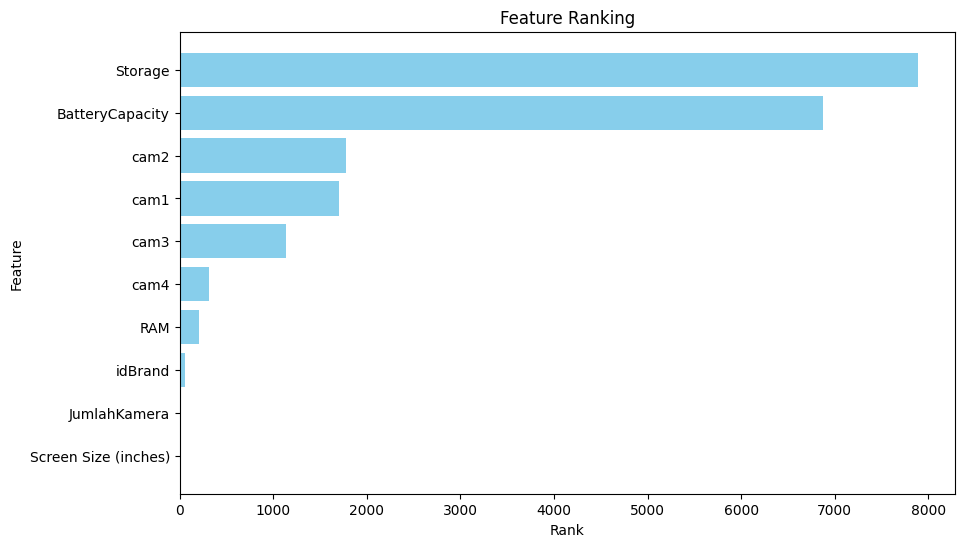

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

selector = SelectKBest(score_func=chi2, k=10)

selector.fit(x_train, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

codingan diatas digunakan untuk memvisualisasikan peringkat fitur-fitur berdasarkan statistik chi-square untuk seleksi fitur. Dapat dilihat bahwa fitur storage dan battery capacity sangat mempengaruhi dalam analisis prediksi harga handphone.

###**Tunning Hyperparameter**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Inisialisasi model Decision Tree Regressor
dt_reg = DecisionTreeRegressor()

# Tentukan grid parameter yang akan diuji
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],  # kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],  # jumlah minimum sampel yang diperlukan untuk membagi simpul internal
    'min_samples_leaf': [1, 2, 4],  # jumlah minimum sampel yang diperlukan untuk menjadi daun
    'max_features': ['auto', 'sqrt', 'log2']  # jumlah fitur yang harus dipertimbangkan saat mencari pemisahan terbaik
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=dt_reg, param_grid=param_grid, cv=5)

# Lakukan pencarian grid pada data yang telah dinormalisasi
grid_search.fit(x_train, y_train)

# Cetak parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

# Gunakan model terbaik untuk membuat prediksi
y_pred_tuned = grid_search.best_estimator_.predict(x_test)

# Hitung dan cetak akurasi sebelum tuning
acc_before_tuning = grid_search.score(x_test, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

# Hitung dan cetak akurasi setelah tuning
acc_after_tuning = grid_search.best_estimator_.score(x_test, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

Parameter terbaik: {'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}
Akurasi sebelum tuning: 0.8581124604548059
Akurasi setelah tuning: 0.8581124604548059


Dapat dilihat dari codingan diatas digunakan untuk mencari parameter terbaik untuk model Decision Tree Regressor, melakukan tuning parameter, dan mengukur perbedaan akurasi model sebelum dan setelah tuning. Dan hasil dari tuningnya dapat dilihat mengalami kesamaan karena parameter  yang digunakan oleh model Decision Tree Regressor sudah cukup optimal untuk dataset yang digunakan.

##**Determine Next Steps**

Pada awal modeling menggunakan algoritma klasifikasi yaitu gaussian, knn, dan decision tree. Tapi setelah lanjut ketahap evaluasi, model yang digunakan ternyata tidak bisa dilanjutkan, karena pada dataset terdapat banyak fitur sehingga model algoritma klasifikasi dari gaussian dan knn kurang optimal untuk menjalankan analisis prediksi harga handphone tersebut. Karena itu model yang digunakan adalah  linear regresi dan juga decision tree, karena kedua algortima ini mampu bekerja dengan optimal dan menjalankan analisis prediksi yang diharapkan.
Sehingga model yang sekarang digunakan dapat lanjut ke tahap berikutnya.
Dan dapat disimpulkan dari langkah-langkah penting telah dilakukan. Pertama, data diproses dan dipisahkan menjadi fitur dan target, lalu dibagi menjadi data pelatihan dan data uji. Berbagai model regresi, termasuk Linear Regression dan Decision Tree Regressor, diterapkan dan dievaluasi menggunakan metrik evaluasi yang relevan. Fitur-fitur yang paling penting diidentifikasi menggunakan metode seleksi fitur, sementara model Decision Tree Regressor ditingkatkan kinerjanya melalui tuning parameter dengan menggunakan Grid Search Cross Validation. Evaluasi akhir dilakukan untuk membandingkan kinerja model sebelum dan setelah tuning. Dan hasil dari analisis langkah-langkah yang telah dilakukan dalam tahap evaluasi hingga tunning hyperparameter, bahwa model algoritma decision tree menghasillkan hasil yang baik dibandingkan dengan model regresi linear.